In [22]:
!pip show scikit-learn
!pip show pandas

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promote produ

In [23]:
!pip show numpy

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /Users/anaconda3/envs/dev/lib/python3.10/site-packages
Requires: 
Required-by: altair, astropy, bokeh, Bottleneck, Cartopy, cftime, contourpy, datashader, gensim, geoviews, h5py, holoviews, hvplot, imagecodecs, imageio, imbalanced-learn, lightgbm, matplotlib, netCDF4, numba, numexpr, pandas, patsy, pyarrow, pydeck, pyerfa, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, shapely, statsmodels, streamlit, tables, tifffile, xarray, xgboost


In [1]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df= pd.read_csv(
    "../Resources/global_food_wastage_dataset.csv")
df['index'] = range(len(df))
df = df.set_index('index')

# Display sample data
df.head(10)

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
index,,,,,,,,
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
5,India,2024,Fruits & Vegetables,11962.89,11196.04,136.21,1311.91,37.09
6,Germany,2024,Prepared Food,45038.72,39191.25,179.27,1349.45,68.93
7,China,2019,Fruits & Vegetables,12791.20,12233.28,90.80,1229.29,59.90
8,UK,2019,Meat & Seafood,14795.65,14346.97,128.91,450.33,59.01


In [3]:
df.info()
#No Null values-no need for imputation 
#Food Category is a string-May need encoding

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 351.6+ KB


In [4]:
# Generate summary statistics
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [5]:
df = df.rename(columns={'Country':'country', 'Year': 'year', 'Total Waste (Tons)': 'total_waste', 'Economic Loss (Million $)': 'economic_loss', 'Avg Waste per Capita (Kg)': 'avg_waste', 'Population (Million)': 'population', 'Household Waste (%)':'household_waste', 'Food Category':'food_category'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          5000 non-null   object 
 1   year             5000 non-null   int64  
 2   food_category    5000 non-null   object 
 3   total_waste      5000 non-null   float64
 4   economic_loss    5000 non-null   float64
 5   avg_waste        5000 non-null   float64
 6   population       5000 non-null   float64
 7   household_waste  5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 351.6+ KB


In [ ]:
sns.pairplot(data=df)
plt.show()

In [ ]:
#Look at Economic loss and total waste, strong correlation

In [7]:
df.columns

Index(['country', 'year', 'food_category', 'total_waste', 'economic_loss',
       'avg_waste', 'population', 'household_waste'],
      dtype='object')

In [8]:
# Define Preprocessing Pipelines

# Define preprocessing for numeric features (Age, Fare, Family_Size) (note that for age, we just use the column median, not split by gender)
numeric_features = ['economic_loss', 'avg_waste', 'population', 'household_waste'] # You can also do this in a loop, select the numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (Pclass, Embarked) 
categorical_features = ['year', 'food_category', 'country']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [9]:
# Correlation Analysis (this is optional and not needed for the ML Experiment)
# It just shows what the data looks like after transformation before training
# We will still declare a full pipeline of preprocessing + training

# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(df)

# Extract one-hot encoder from the categorical transformer pipeline
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
encoded_cat_features = ohe.get_feature_names_out(categorical_features)

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
encoded_feature_names = numeric_features + list(encoded_cat_features)

preprocessed_X_train = preprocessor.transform(df)

# Create the final DataFrame
df_final = pd.DataFrame(preprocessed_X_train.toarray() if hasattr(preprocessed_X_train, 'toarray') else preprocessed_X_train,
                        columns=encoded_feature_names)

# Optional: Add back any original columns if needed
df_final["total_waste"] = df["total_waste"].values
df_final.head()

,economic_loss,avg_waste,population,household_waste,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023,year_2024,food_category_Bakery Items,food_category_Beverages,food_category_Dairy Products,food_category_Frozen Food,food_category_Fruits & Vegetables,food_category_Grains & Cereals,food_category_Meat & Seafood,food_category_Prepared Food,country_Argentina,country_Australia,country_Brazil,country_Canada,country_China,country_France,country_Germany,country_India,country_Indonesia,country_Italy,country_Japan,country_Mexico,country_Russia,country_Saudi Arabia,country_South Africa,country_South Korea,country_Spain,country_Turkey,country_UK,country_USA,total_waste
0,-0.434580,-0.708165,-1.537905,0.308676,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19268.63
1,-1.412240,1.599429,1.111495,-1.677518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3916.97
2,-1.103413,1.106829,0.744097,-0.170839,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9700.16
3,1.061068,0.206554,0.612273,-1.565401,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46299.69
4,0.816834,-0.090971,0.990950,-1.207489,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33096.57


In [ ]:
corrs = df_final.corr()
corrs

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
abs(corrs["total_waste"]).sort_values(ascending=False) 

In [ ]:
#Economic Loss has a strong linear correlation. 
#Highest total waste country was Turkey
#No other strong correlations

---

### Machine Learning 

---

In [10]:
 # Step 1: Get the Data
X = df.drop(columns=["total_waste"])
y = df["total_waste"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5000, 7)
(3750, 7)
(1250, 7)


In [11]:
X_train.head() # NOTE: THIS IS UNSCALED & UNENCODED 

,country,year,food_category,economic_loss,avg_waste,population,household_waste
index,,,,,,,
4884,Brazil,2019,Bakery Items,42234.27,162.25,39.83,45.30
3163,USA,2023,Frozen Food,18712.96,162.09,1231.96,42.06
490,Australia,2024,Dairy Products,7952.53,27.61,88.75,54.41
862,Japan,2019,Dairy Products,38702.18,199.40,866.88,39.90
1740,Australia,2023,Bakery Items,12029.98,192.59,682.76,50.71


In [12]:
# Function for Regression
def doRegression(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Generate metrics TRAIN
    train_r2 = r2_score(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(train_mse)
    
    train_results = f"""TRAIN METRICS
    R2: {train_r2}
    MSE: {train_mse}
    RMSE: {train_rmse}
    MAE: {train_mae}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_r2 = r2_score(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(test_mse)
    
    test_results = f"""TEST METRICS
    R2: {test_r2}
    MSE: {test_mse}
    RMSE: {test_rmse}
    MAE: {test_mae}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Predicted vs Actual Plot
    plt.scatter(y_test, test_preds)
    plt.plot(y_test, y_test)
    plt.title("Predicted vs Actual Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # Residual Plot
    resids = test_preds - y_test
    plt.scatter(test_preds, resids)
    plt.hlines(0, min(test_preds), max(test_preds))
    plt.title("Residual Plot")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.show()

In [13]:
print(df.shape)

(5000, 8)


TRAIN METRICS
    R2: 0.9491759108998418
    MSE: 10060610.93057675
    RMSE: 3171.8466120821085
    MAE: 2445.341311921269
    
TEST METRICS
    R2: 0.9518254737444244
    MSE: 10474356.117218671
    RMSE: 3236.4109932483348
    MAE: 2515.811222739518
    


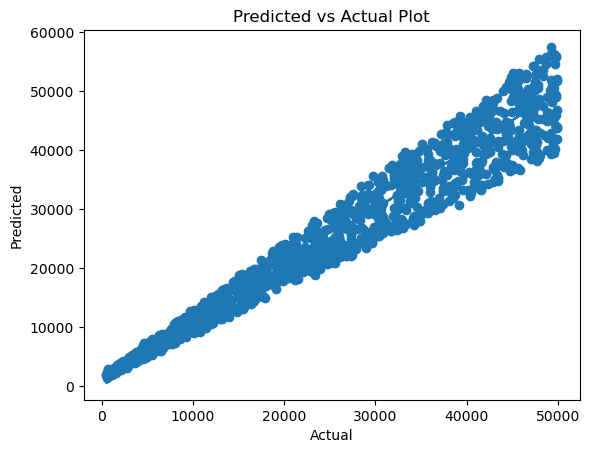

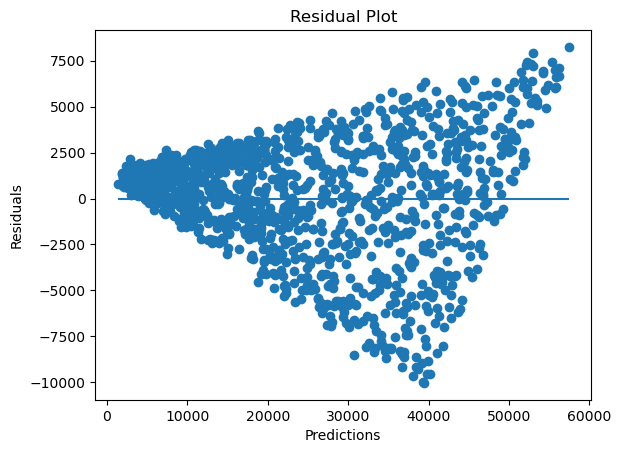

In [14]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Do Machine Learning
doRegression(lr, X_train, X_test, y_train, y_test)

In [15]:
#Pretty bad Heteroskedasticity 

TRAIN METRICS
    R2: 0.9933586925589272
    MSE: 1314644.52030426
    RMSE: 1146.579487128677
    MAE: 853.4292201066661
    
TEST METRICS
    R2: 0.9585822308414478
    MSE: 9005266.838451212
    RMSE: 3000.8776780220837
    MAE: 2233.5852439199994
    


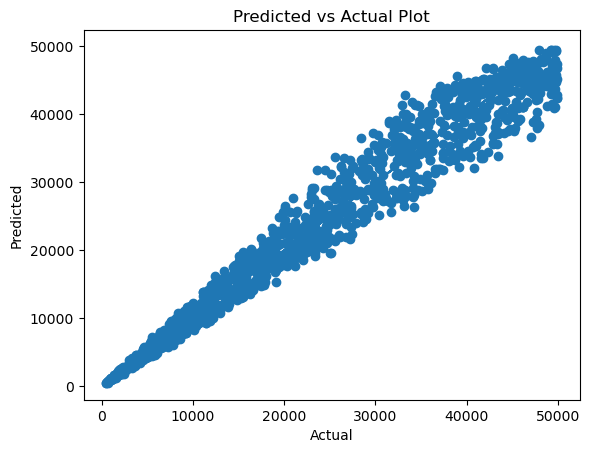

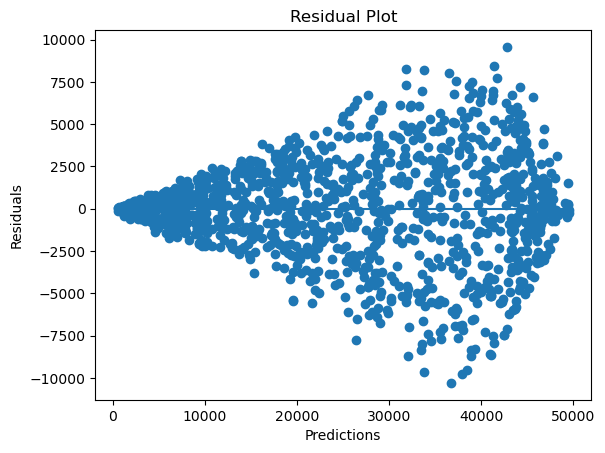

In [16]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Do Machine Learning
doRegression(rf, X_train, X_test, y_train, y_test)


In [17]:
fi = pd.DataFrame(list(zip(X.columns, rf.named_steps['regressor'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,country,0.965579
2,food_category,0.006719
1,year,0.006582
3,economic_loss,0.006432
4,avg_waste,0.000510
6,household_waste,0.000499
5,population,0.000491


[Text(0, 0, 'Country'),
 Text(1, 0, 'Food Category'),
 Text(2, 0, 'Year'),
 Text(3, 0, 'Economic Loss'),
 Text(4, 0, 'Average Waste'),
 Text(5, 0, 'Household Waste'),
 Text(6, 0, 'Population')]

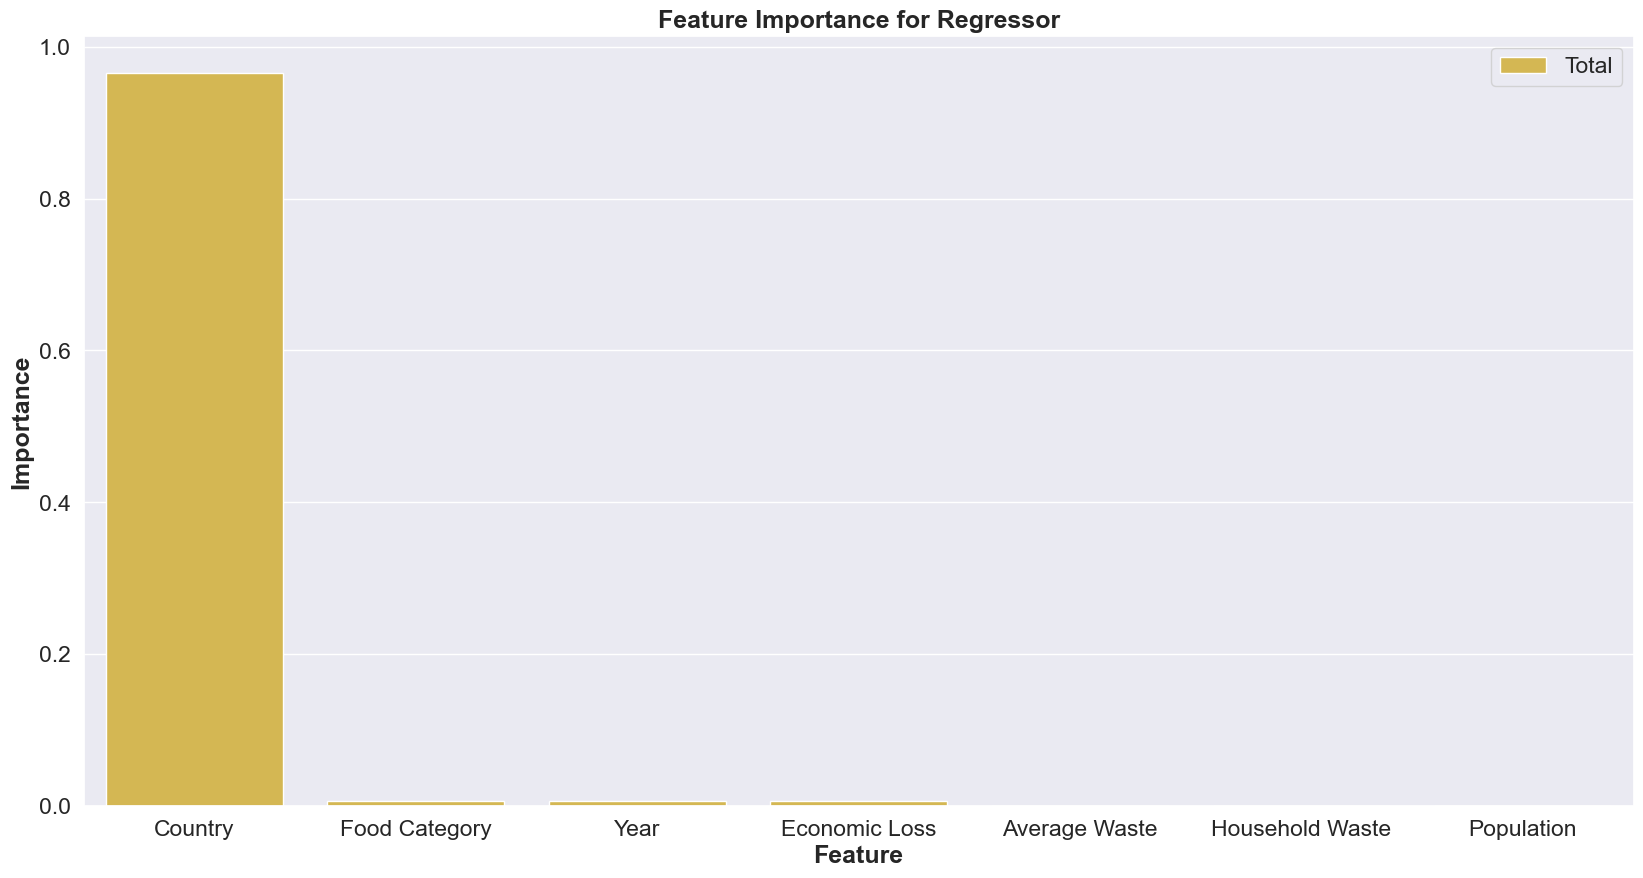

In [18]:
sns.set_theme(palette='pastel', font_scale=1.5)

labels = ['Country', 'Food Category', 'Year', 'Economic Loss', 'Average Waste', 'Household Waste', 'Population']

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Feature", y="Importance", data=fi,
            label="Total", color="#EAC33D")
plt.xlabel('Feature', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')
plt.title('Feature Importance for Regressor', fontweight='bold')

ax.set_xticklabels(labels)


## Model Productionalization 

In [19]:
# Retrain the model on the ENTIRE dataset
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
rf.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['economic_loss', 'avg_waste',
                                                   'population',
                                                   'household_waste']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=<NA>,
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['year', 'food_category',
                                                   'country'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [20]:
  # Save off my models
import pickle

# Model
pickle.dump(rf, open("waste_model_pipeline.h5", 'wb'))